## Breast Cancer Survival Prediction with Machine Learning

#### Description
- Breast cancer is one of the types of cancer that starts in the breast. It occurs in women, but men can get breast cancer too. It is the second leading cause of death in women
- Using machine learning to predict whether a patient will survive the disease.

- The training set used in this prediction has over 400 breast cancer patients who underwent surgery for the treatment of breast cancer

- By using the dataset, the tast is to predict whether breast cancer patient will survive or not after the surgery

### Step 1: Prepare Data

In [1]:
# Import necessary libraries

import pandas as pd 
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer


In [2]:
# Import the dataset
df = pd.read_csv('data/BRCA.csv')

In [3]:
# View the dataset and inspect its properties
df.head()

df.info()

print(df.shape)

# Check the null values in the dataset
print(f"Null values are: {df.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

## Step 2: Clean the df
- Drop the null values

In [4]:
# Delete all the null values
df.dropna(inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [5]:
# Rename the columns

df = df.rename(columns={
    'ER status': 'ER_status',
    'PR status': 'PR_status',
    'HER2 status': 'HER2_status'
})

#### Inspect which gender is mostly affected by Breast Cancer
-Breast cancer is mostly found in females, so lets check how many people where diagnosed or when through the surgery in the dataset:

In [6]:
print(df.Gender.value_counts())

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64


NB: From the dataset it is evident that most of the people who went through the surgery were woman

## Step 3: Explore the Data

In [7]:
# Describe the dataset
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


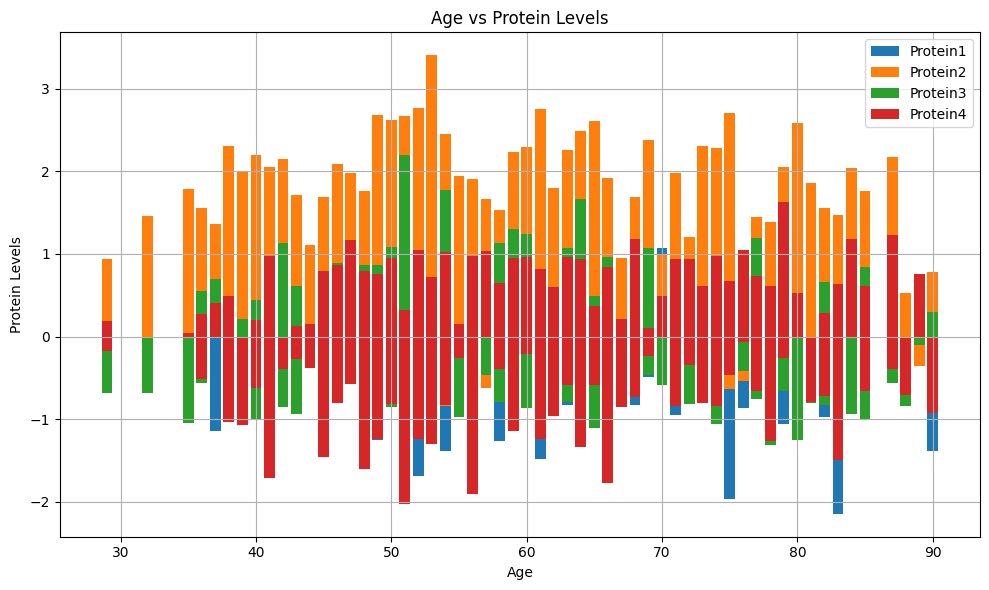

In [8]:
# Visualize the dataset

plt.figure(figsize=(10, 6))

# Plotting Age vs Protein1 as a bar graph
plt.bar(df['Age'], df['Protein1'], label='Protein1')
# Plotting Age vs Protein2 as a bar graph
plt.bar(df['Age'], df['Protein2'], label='Protein2')
# Plotting Age vs Protein3 as a bar graph
plt.bar(df['Age'], df['Protein3'], label='Protein3')
# Plotting Age vs Protein4 as a bar graph
plt.bar(df['Age'], df['Protein4'], label='Protein4')

# Adding labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Protein Levels')
plt.title('Age vs Protein Levels')

# Adding a legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Check the correlation between the proteins and the age

correlation = df['Age'].corr(df['Protein4'])
print(f'Correlation between age and proteins: {correlation}')

Correlation between age and proteins: 0.0954168335061746


NB: There's a very low correlation between the type of correlation and the age

#### Check the Stages of Cancer from the patients

In [10]:
# Tumor Stage
stage = df['Tumour_Stage'].value_counts()

figure = px.pie(values=stage.values, names=stage.index, title='Tumor Stage')

figure.show()
stage

Tumour_Stage
II     180
III     77
I       60
Name: count, dtype: int64

NB: From the data it is evident that most of the patients are in the second stage. Now lets look at the histology(a description of a tumour based on how abnormal the cancer cells and tissue look under a microscope and how quickly cancer can grow and spreed)

### Check the histology of the cancer cells

In [11]:
histology = df['Histology'].value_counts()

figure = px.pie(values=histology.values, names=histology.index, title='Histology')

figure.show()
histology

Histology
Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: count, dtype: int64

NB: It is evident that the `Infiltrating Ductal Carcinoma` have the higher percentage and are likely to grow cancer

### Inspect the Estrogen Receptor(ER), Progesterone Receptor(PR) and Human Epidermal Growth Factor Receptor(HER2) to see their statuses

In [12]:
# ER Status
print(f"Status: {df['ER_status'].value_counts()}")

print(" ")
# PR status
print(f"Status: {df['PR_status'].value_counts()}")

print(" ")

# HER2 status
print(f"Status: {df['HER2_status'].value_counts()}")


Status: ER_status
Positive    317
Name: count, dtype: int64
 
Status: PR_status
Positive    317
Name: count, dtype: int64
 
Status: HER2_status
Negative    288
Positive     29
Name: count, dtype: int64


NB: From the data it is evident that all patients had the Estrogen Receptors and Progesterone Receptors, but `only 288` people had HER2 and `29` did not have it

### Explore the types of the surgeries that were done to the patients

In [13]:
df.info()

surgery = df['Surgery_type'].value_counts()

figure = px.pie(values=surgery.values, names=surgery.index, title='Surgery Type')

figure.show()
surgery

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER_status           317 non-null    object 
 10  PR_status           317 non-null    object 
 11  HER2_status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

Surgery_type
Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: count, dtype: int64

- The data contains categorical features. To use this data to train a machine learning model, I need to transform the values of all the categorical columns.

In [14]:
df['Tumour_Stage'] = df['Tumour_Stage'].map({'I': 1, 'II': 2, 'III': 3})

df['Histology'] = df['Histology'].map({'Infiltrating Ductal Carcinoma': 1, 'Infiltrating Lobular Carcinoma': 2, 'Mucinous Carcinoma': 3})

df['ER_status'] = df['ER_status'].map({'Positive': 1, 'Negative': 0})

df['PR_status'] = df['PR_status'].map({'Positive': 1, 'Negative': 0})

df['HER2_status'] = df['HER2_status'].map({'Positive': 1, 'Negative': 0})

df['Gender'] = df['Gender'].map({'FEMALE': 1, 'MALE': 2})

df['Surgery_type'] = df['Surgery_type'].map({'Other': 1, 'Modified Radical Mastectomy': 2, 'Lumpectomy': 3, 'Simple Mastectomy': 4})

df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER_status,PR_status,HER2_status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,1,0.080353,0.42638,0.54715,0.273680,3,1,1,1,0,2,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,0,3,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,0,1,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,0,2,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,1,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,0,1,06-May-17,27-Jun-19,Dead


### Step 4: Split

- Split the data into training and test set

In [15]:
# Split the dataset
X = np.array(df[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
                   'Tumour_Stage', 'Histology', 'ER_status', 'PR_status',
                   'HER2_status', 'Surgery_type']])
y = np.array(df[['Patient_Status']]).ravel()
xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.10, random_state=42)

In [16]:
X.shape, y.shape

((317, 12), (317,))

### Step 5: Build Model

In [17]:
# Train the model
model = SVC()

model.fit(xtrain,ytrain)

SVC()

In [18]:
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array(
    [[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))

['Alive']
